### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the final section of this lesson.


(1) What is the independent variable? What is the dependent variable?

The independent variable here is how the text is displayed like <font color='blue'>orange</font>, <font color='red'>red</font>, and <font color=orange>yelllow</font>
The dependent variable is the total time needed to read identify the ink color while reading the test.
For the example above it's the time needed to say out loud blue, red, and orange. 

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

$$H_0: \mu_{cong} - \mu_{incong} = 0$$


$$H_A: \mu_{cong} - \mu_{incong} \neq 0$$

**$\mu_{cong}$ and $\mu_{incong}$ are the population mean test completion times for congruent and incongruent text, respectivley.**

Null hypthesis:
H0: For the test participants population, there is <u>no difference</u> in the mean time to read the congruent and incongruent texts.

Alternative hypothesis:
H1 = For the test participants population, there <u>is</u> a diffrence in time to read congurent and incongruent texts.

Use Student's t-distribution for such a task since the sample size is small.
We will also assume that the dependent variable follows a normal distribution, the data is continuous, and the sample is a random sample from its population.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
#Import packages and import file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
stroop = pd.read_csv('stroopdata.csv')

In [2]:
#Take a look at the data
stroop.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
#See size of data
stroop.shape
#The data has 24 entries which is used to answer question 2) above.

(24, 2)

In [4]:
#Get the mean of congruent
stroop.Congruent.mean()

14.051125000000004

In [5]:
#Get the standard dev of congruent
stroop.Congruent.std()

3.559357957645195

In [6]:
#Get the mean of incongruent
stroop.Incongruent.mean()

22.01591666666667

In [7]:
#Get the standard dev of incongruent
stroop.Incongruent.std()

4.797057122469138

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

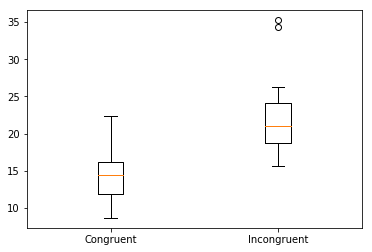

In [8]:
#Use a box plot as first visualization.
#Combine the data in one array
plot_data = [stroop.Congruent, stroop.Incongruent]
#Plot the data in box plot
bp = plt.boxplot(plot_data)
#Label the ticks
plt.xticks([1,2], ['Congruent', 'Incongruent'])
plt.show()

The congruent data clearly as a different average reading time than the incongruent one.
We can also notice outliers for the incongruent data.
The box plots for congruent are more tightly packed together than the incongruent data.

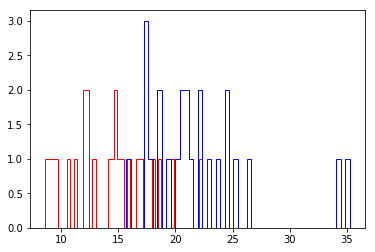

In [9]:
#Create histogram
nbin=50
hist_1= plt.hist(stroop.Congruent, histtype='step',bins =nbin, stacked=True, color='red')
hist_2= plt.hist(stroop.Incongruent, histtype='step', bins =nbin, stacked=True, color='blue')
plt.show()

The stacked histogram shows again an outlier for the incongruent text.
It also shows how the congruent data with its shorter times is skewed to the right (positive skew).

In [14]:
#Import scipy
from scipy import stats
#perform Welch’s t-test, which does not assume equal population variance
stats.ttest_rel(stroop.Congruent, stroop.Incongruent)

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

confidence interval is 95% for a two tailed t-test.
With a p value smaller than 0.05 we can reject the null hypothesis.
The results align with our expectations from earlier, the difference was most obviously shown in the box plots.

In [11]:
#Calculate the confidence interval
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(stroop.Congruent), sms.DescrStatsW(stroop.Incongruent))
print (cm.tconfint_diff(usevar='unequal'))



(-10.424698188163974, -5.5048851451693626)


/Users/nadimkawwa/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


The t statistic calcualted earlier falls within the confidence interval calcualted above.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

Identifying a color appears to be an automated habit that becomes more ingrained over time.

We could set up a series of stoplight intersections that drivers have to go through. However these vary drastically from what we are used to, for example:
Flashing green means stop
Solid red means go
Solid yellow means make a right turn
etc...

We can measure reaction time at each intersection and total time needed to finish the track.